<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Adding-new-data" data-toc-modified-id="Adding-new-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Adding new data</a></span></li><li><span><a href="#Check-the-data-model" data-toc-modified-id="Check-the-data-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check the data model</a></span></li><li><span><a href="#Check-for-similarities" data-toc-modified-id="Check-for-similarities-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check for similarities</a></span></li><li><span><a href="#Update-the-data-model" data-toc-modified-id="Update-the-data-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Update the data model</a></span></li><li><span><a href="#Create-the-new-class" data-toc-modified-id="Create-the-new-class-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create the new class</a></span></li><li><span><a href="#Add-tests" data-toc-modified-id="Add-tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Add tests</a></span></li><li><span><a href="#Update-configuration-tutorial" data-toc-modified-id="Update-configuration-tutorial-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Update configuration tutorial</a></span></li><li><span><a href="#Add-workflow-diagrams" data-toc-modified-id="Add-workflow-diagrams-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Add workflow diagrams</a></span></li></ul></div>

# Adding new data

In eBOSS, we were obviously reading eBOSS data. But we may want to read data from other surveys. Fore example we may want to read DESI data, maybe even more than one mode. Also, we may want to read Mocks. So, how should we proceed?

We should follow these steps:
1. Check the data model
2. Check for similarities
3. Update the data model
4. Create the new class
5. Add tests
6. Update configuration tutorial with the available options
7. Add workflow diagrams if the correction is complex


# Check the data model

The first step when considering adding a new correction is to check the current data model. If things were kept updated it should look like this:

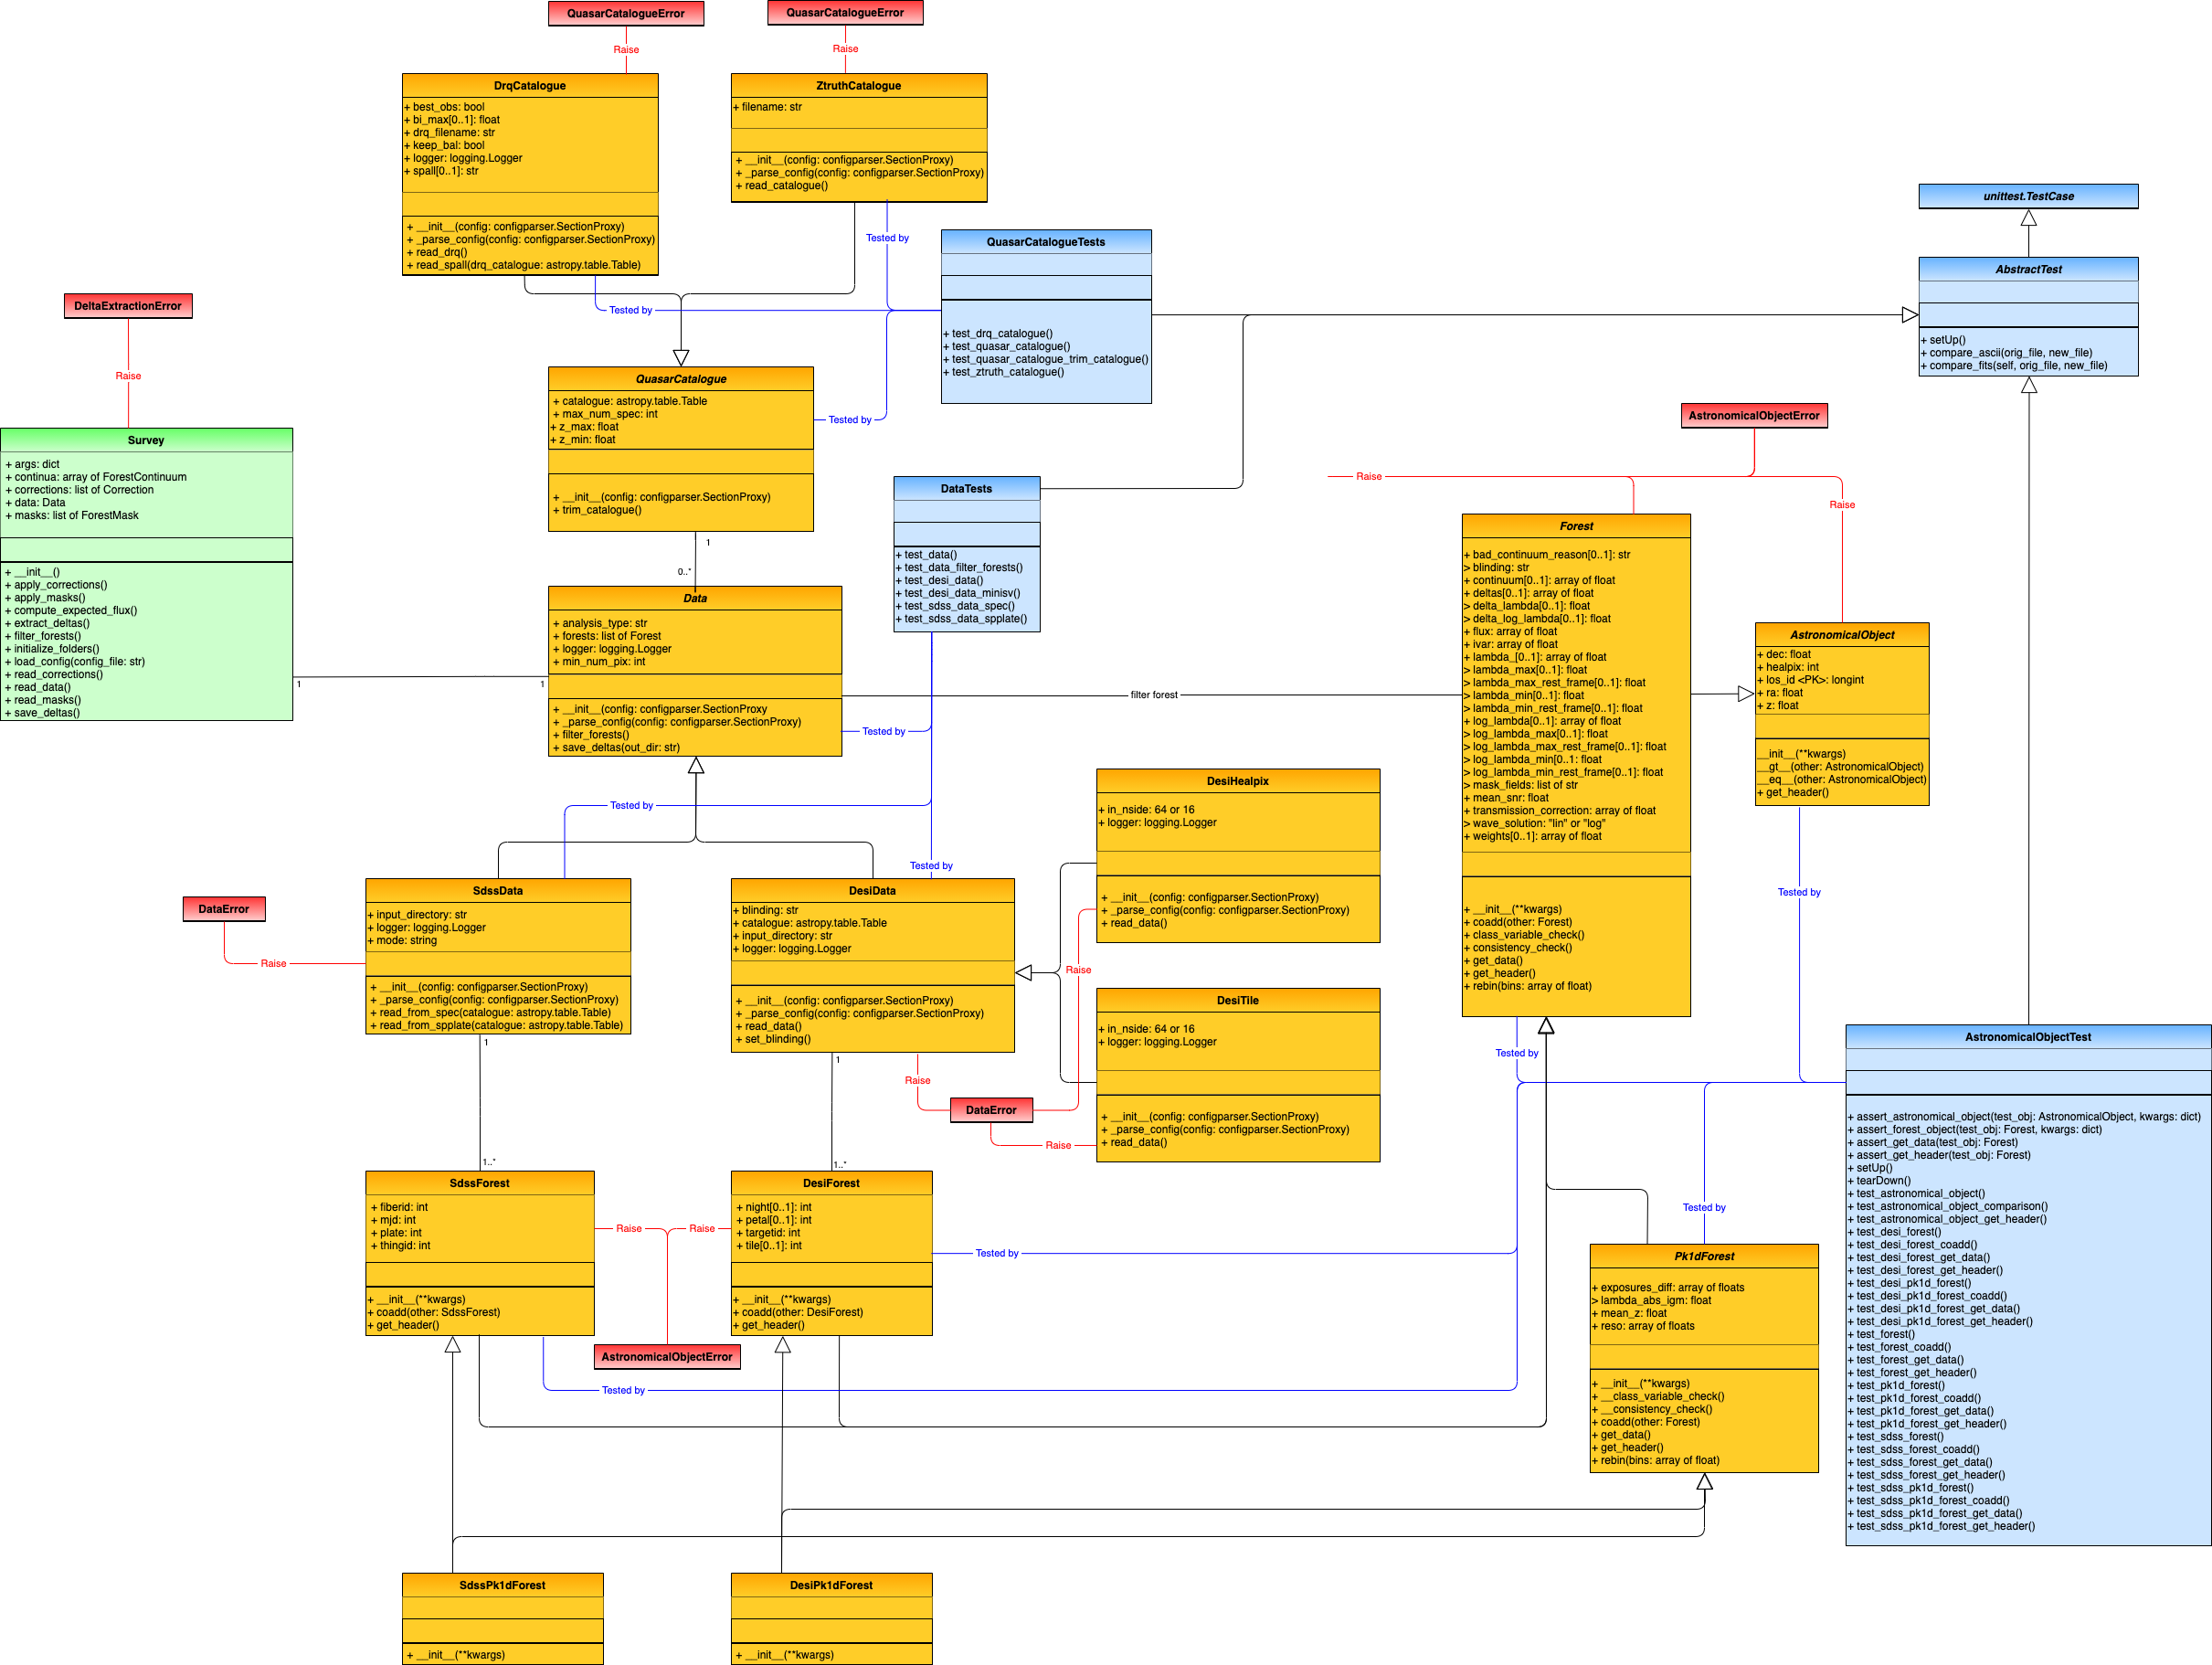

In [1]:
from IPython.display import Image
Image("../docs/data_model/data_model-Data.png")

And the Full Data Model to put things in context

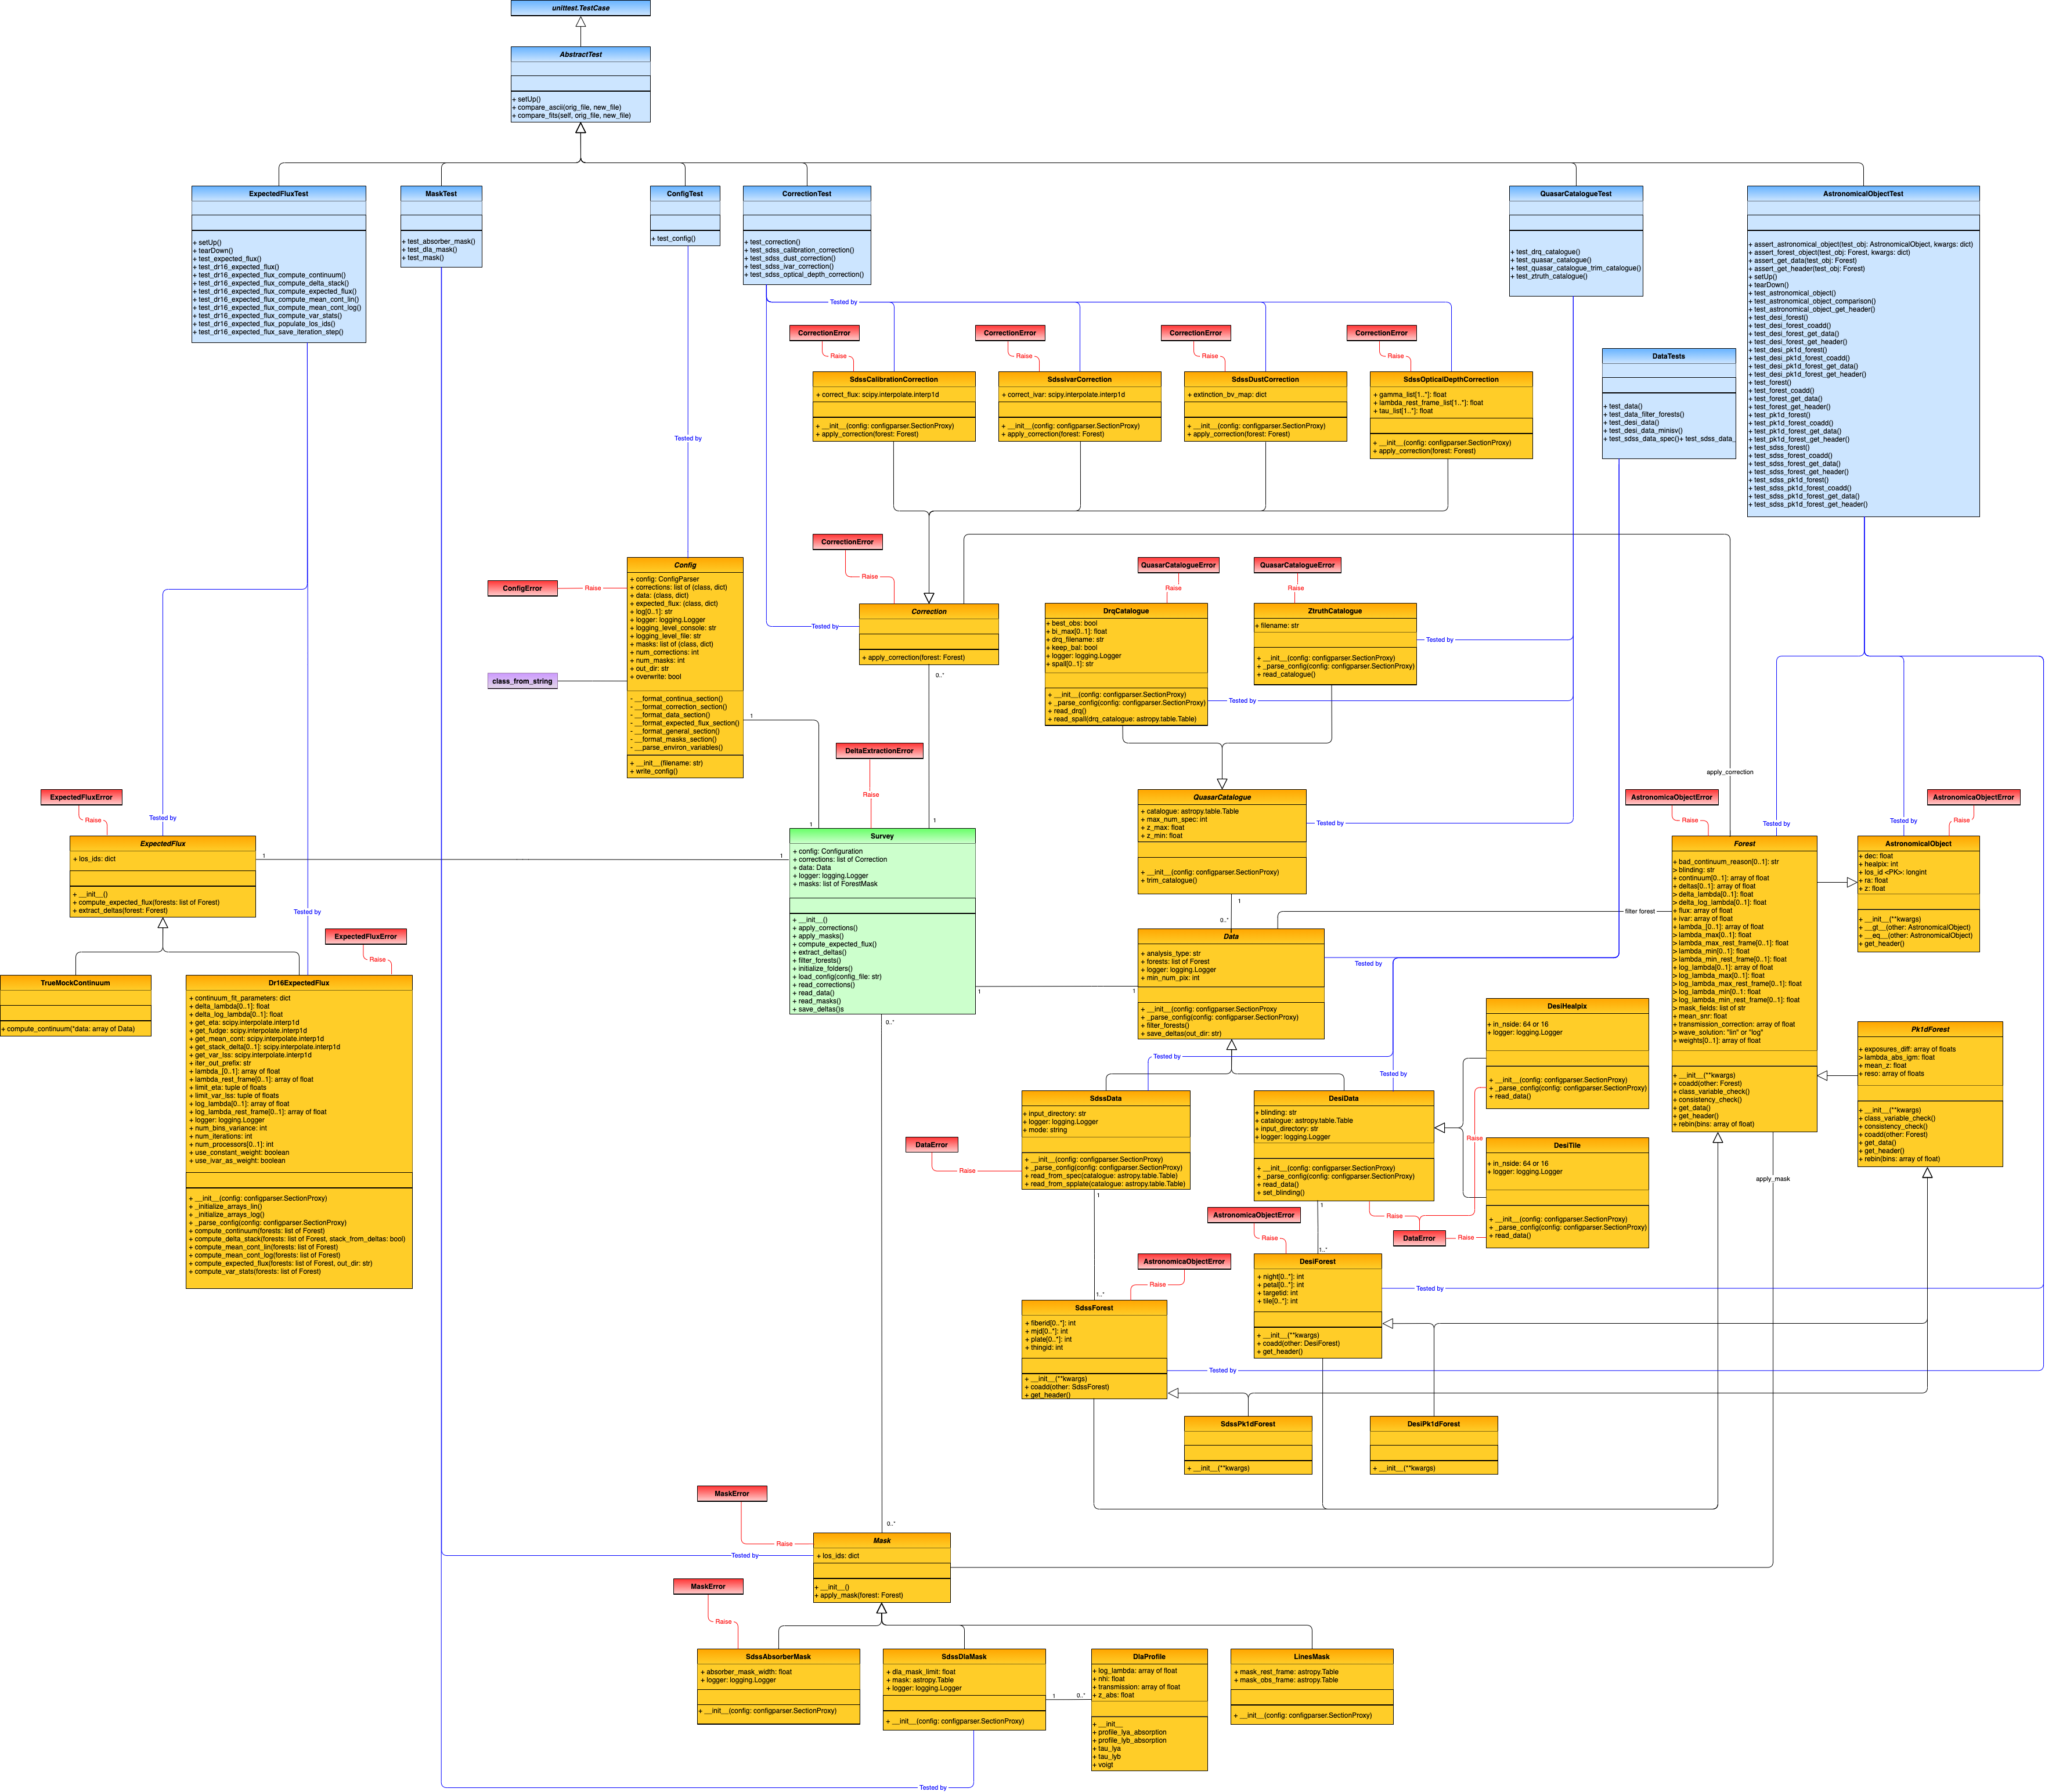

In [2]:
Image("../docs/data_model/data_model-FullDataModel.png")

# Check for similarities
Now that we know the data model, we can look for similarities. Are any of the existing corrections similar? If only minor changes are required (maybe the correction is the same, just the input format of the correction is different), it might be better to inherit from one of the already existing classes. Otherwise a new class will need to be added. The idea is that we have the least amount of repeated code.

Here are a couple of examples:

- Suppose that we want to read healpix data from DESI. In this case we would create a completely new class DesiHealpix that will inherit from Data.

- Suppose that we now want to read DESI mocks, and that it is similar from normal DesiHealpix data but the filename and folder structures change, and the blinding enforcing also changes. Then we could have a new class DesisimMocks inherit from DesiHealpix and then modify only the relevant parts

- Suppose that we want to read mocks that also contain the resolution matrix. In this case we will just modify the existing class DesisimMocks

# Update the data model
Once we have an idea in mind, we need to update the data model. To do so, we go to https://app.diagrams.net/ and load the data model file from `py/picca/delta_extraction/docs/data_model/data_model.drawio`. Once the file it is loaded, we add the new classes to the diagrams. We need to modify the diagram under "Data", but also the "FullDataModel" diagram. Do not forget to modify the test classes accordingly!

Using the export tool, we update the plots in `py/picca/delta_extraction/docs/data_model/`. 

# Create the new class
Now it's time to create the new class. In general, the code will have this structure:

In [5]:
from picca.delta_extraction.data import Data

class MyNewData(Data):
    """This is my new class loading data
    
    Methods
    -------
    __init__
    my_reading_function
    
    Attributes
    --------
    useful_attribute: type
    This is a useful attribute that we need to read the data
    """
    def __init__(self, config):
        """Initializes class instance.

        Arguments
        ---------
        config: configparser.SectionProxy
        Parsed options to initialize class
        """        
        # initialize parent class
        super.__init__(config)
        
        # initialize class
        pass
    
        # read the data
        self.my_reading_function()
    
    def my_reading_function(self, my_argument):
        """Reads data

        Arguments
        ---------
        my_argument: MyType
        My argument of type MyType

        Raises
        ------
        DataError if the class is misued
        """
        # does something to read data, updates the list self.forests
        # maybe raise some errors if, for example, a file is missing
        pass

Alternatively, if we are just slightly modifying an existing correction, we can inherit from it:

In [6]:
from picca.delta_extraction.correction import Correction

class MyOtherNewData(MyNewData):
    """This is my other new correction that inherits from MyNewCorrection
    
    Methods
    -------
    __init__
    my_reading_function (from MyNewData)
    
    Attributes
    --------
    useful_attribute: type
    This is a useful attribute that we need to read the data
    """
    def __init__(self, config):
        """Initializes class instance.

        Arguments
        ---------
        config: configparser.SectionProxy
        Parsed options to initialize class
        """
        # initialize class
        pass
    
    

The code should be saved in a file called `my_new_data.py` (for `MyNewData`) or `my_other_new_data.py` (for `MyOtherNewData`) which should be placed under `py/picca/delta_extraction/data_catalogues/`. This way the configuration parser will be able to find it without us having to specify the module path

# Add tests
Once we have created our class, we need to add some tests that show that the class is working properly. This way, if we need to do some updates, we will know it still works as intended. Tests for corrections are run from `data_tests.py`. What we need to do is to add one or more methods. Note that they need to start with 'test': 

In [7]:
def test_my_new_data(self):
    """Test MyNewData"""
    pass

def test_my_new_data_specific_function(self):
    """Test a specific function or method used by MyNewData"""
    pass

If possible, it would be nice to keep the functions in alphabetical ordering so that we can quickly find them later on

# Update configuration tutorial
Now that we are sure it works, we need to update the [data] section of the configuration tutorial to explain the arguments (required or not) used in the new correction. This usually includes some input filenames and/or some flags

# Add workflow diagrams
If the correction is simple, we are already finished. However, if the Data interacts with other classes (e.g. such as quasar catalogues) or functions, or has a number of methods, it will be useful to draw a workflow diagram. This diagram can help other people (including your future self) understand what is happening and where are things happening. This is useful not only for debugging, but also to add possible extensions to the correction.

To create a workflow diagram go to https://app.diagrams.net/ and load the workflow diagrams file from `py/picca/delta_extraction/docs/workflow/workflow.drawio`. Once the file it is loaded, we add the new workflow to the diagrams. 

Using the export tool, we update the plots in `py/picca/delta_extraction/docs/workflow/`. 

Congratulations you are done!! Now you should do a Pull Request on GitHub